# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Freskina

Student name: Fatjon
    
ID: 2056098

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2056098
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True) #Returns the sorted unique elements of an array
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [49 62 68 67 53 62 53 70 59 57]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


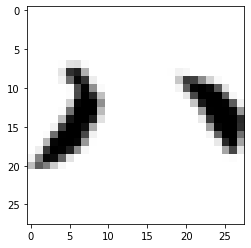

LABEL: 5
INPUT:


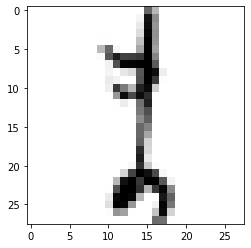

LABEL: 6
INPUT:


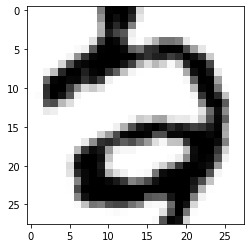

LABEL: 4
INPUT:


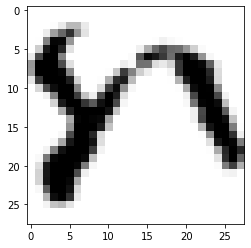

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL:') 

print("Best parameters set found:", clf.best_estimator_)

print("Score with best parameters:", clf.best_score_)

print("All scores on the grid:", clf.cv_results_["mean_test_score"])
# ADD YOUR CODE

RESULTS FOR LINEAR KERNEL:
Best parameters set found: SVC(C=0.1, kernel='linear')
Score with best parameters: 0.7833333333333333
All scores on the grid: [0.77333333 0.78333333 0.77833333 0.77833333]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
svc = SVC(kernel='poly', degree=2)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", clf.best_estimator_)

print("Score with best parameters:", clf.best_score_)

print("\nAll scores on the grid:", clf.cv_results_["mean_test_score"])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: SVC(C=0.1, degree=2, gamma=0.1, kernel='poly')
Score with best parameters: 0.7949999999999999

All scores on the grid: [0.11666667 0.78166667 0.79166667 0.44166667 0.795      0.79166667
 0.78166667 0.79166667 0.79166667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
svc = SVC(kernel='poly', degree=3)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
degree = 3

print ('RESULTS FOR POLY DEGREE = ', degree, ' KERNEL')

print("Best parameters set found:" , clf.best_estimator_)

print("Score with best parameters:", clf.best_score_)

print("\nAll scores on the grid:",clf.cv_results_["mean_test_score"])

RESULTS FOR POLY DEGREE =  3  KERNEL
Best parameters set found: SVC(C=0.01, gamma=0.1, kernel='poly')
Score with best parameters: 0.7300000000000001

All scores on the grid: [0.11666667 0.73       0.725      0.36833333 0.72333333 0.725
 0.72166667 0.725      0.725     ]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
svc = SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:" , clf.best_estimator_)

print("Score with best parameters:", clf.best_score_)

print("All scores on the grid:",clf.cv_results_["mean_test_score"])

RESULTS FOR rbf KERNEL
Best parameters set found: SVC(C=10, gamma=0.01)
Score with best parameters: 0.8383333333333333
All scores on the grid: [0.11666667 0.24166667 0.11666667 0.11666667 0.645      0.81666667
 0.18166667 0.11666667 0.79333333 0.83833333 0.21333333 0.11666667
 0.78833333 0.83833333 0.21333333 0.11666667]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ? [The best prediction seems to be provided by  the Radial Basis Function kernel, followed by the degree 2 polynomial, linear and finally the degree 3.]

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_svc = SVC(C=10, kernel = 'rbf', gamma=0.01)
best_svc.fit(X_train, y_train)
print("Training error for the best SVM model: ", 1 - best_svc.score(X_train, y_train))
print("Test error for the best SVM model: ", 1 - best_svc.score(X_test,y_test))

Training error for the best SVM model:  0.0
Test error for the best SVM model:  0.19574999999999998


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

gamma_values = np.logspace(-5,2,8)
print(gamma_values)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


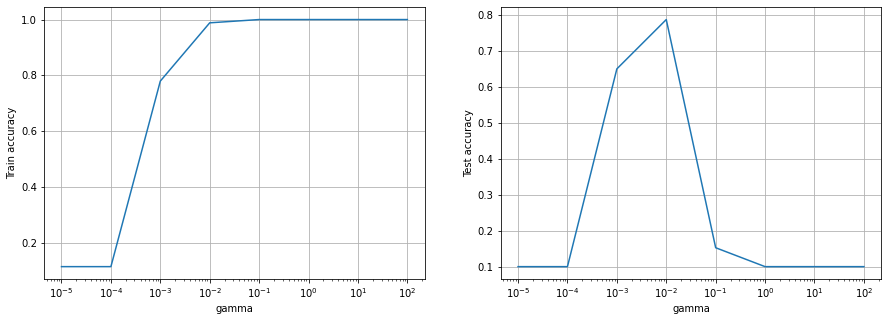

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []
for g in gamma_values:
    svc = SVC(C = 1, kernel = 'rbf', gamma = g)
    svc.fit(X_train, y_train)
    train_acc = svc.score(X_train,y_train)
    train_acc_list.append(train_acc)
    test_acc = svc.score(X_test,y_test)
    test_acc_list.append(test_acc)

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue. [The best value of gamma is 10^-2. Increasing gamma provides good results on the training set but tremendously worse on the test one. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model, providing a good example of overfitting.]

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [191 217 226 187 195 190 197 208 175 214]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV
best_svc = SVC( C=10, kernel = 'rbf', gamma=0.01)
best_svc.fit(X_train, y_train)
print("Training error for the best SVM model from CV: ", 1 - best_svc.score(X_train, y_train))
print("Test error for the best SVM model from CV: ", 1 - best_svc.score(X_test, y_test))

Training error for the best SVM model from CV:  0.0
Test error for the best SVM model from CV:  0.11670689655172417


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e7)
log_clf = logreg.fit(X_train, y_train)
print("Training error for logistic regression: ", 1 - log_clf.score(X_train, y_train))
print("Test error for logistic regression: ", 1 - log_clf.score(X_test, y_test))

Training error for logistic regression:  0.0
Test error for logistic regression:  0.30712068965517236


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C=1, max_iter = 1000) #since default max_iter = 100, max iter exceeded error will occur
log_clf = logreg.fit(X_train, y_train)

print("Training error for logistic regression: ", 1 - clf.score(X_train, y_train))
print("Test error for logistic regression: ", 1 - clf.score(X_test, y_test))

Training error for logistic regression:  0.1855
Test error for logistic regression:  0.19108620689655176


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.[When trained with more data, the best SVM (radial basis one) provides pretty good results: 0 errors on the training set without overfitting. In fact the test error is 0.11, even better than before.]
- the results of SVM and of Logistic Regression. [Logistic regression instead perfectly classifies the training set without regularization but has bad performance on the test set (overfitting). On the other hand when a stronger regularization is provided we have some errors in the training set (probably the most "noisy" samples are not learned) but the result on the test set is better. However SVM has better results compared to Logistic Regression.]

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [ ]:
LR_prediction = log_clf.predict(X_test)
SVM_prediction = best_svc.predict(X_test)

for i in range(len(LR_prediction)):
    
    if (LR_prediction[i] != y_test[i]) and (SVM_prediction[i] == y_test[i]):
        item = y_test[i]
        break

print("First misclassified by logistic regression and correctly classified by SVM sample found: Kuzushiji with label " , item)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [ ]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)

print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print()
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.
[The confusion matrix in the SVM shows how the Kuzushiji with label 2 is predicted wrongly more times on average than other labels for both the models. It could be because the Kuzushiji is "difficult to learn" (?)]